In [1]:
from kaiba import bootlier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Normal and outlier series for uniform noisy distribution, 10 sigma

In [2]:
u_normal = np.random.uniform(low=0,high=1,size=100)
u_odd = np.random.uniform(low=0,high=1,size=100)
u_odd[int(len(u_odd)*0.5)]=np.mean(u_odd)+10*np.std(u_odd)  # 10 sigma outlier in the middle

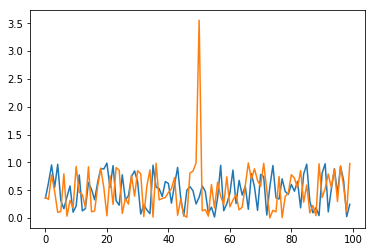

In [3]:
plt.plot(u_normal)
plt.plot(u_odd)

In [4]:
normoutliers = bootlier.find_outliers(u_normal)
print("normal:", normoutliers)

oddoutliers = bootlier.find_outliers(u_odd)
print("odd:", oddoutliers)

normal: ([], [])
odd: ([50], [3.5529003719426835])


In [5]:
normoutliers = bootlier.find_outliers(u_normal,detrend=True)
print("normal:", normoutliers)

oddoutliers = bootlier.find_outliers(u_odd,detrend=True)
print("odd:", oddoutliers)

normal: ([], [])
odd: ([50, 51], [3.5529003719426835, 0.12917084181072125])


## Normal and outlier series for sine wave distribution, 10 sigma

In [6]:
s_normal = np.sin(np.arange(0,6*np.pi,0.1*np.pi))
s_odd = np.sin(np.arange(0,6*np.pi,0.1*np.pi))
s_odd[-1]=np.mean(s_odd)+10*np.std(s_odd)  # 10 sigma outlier at the end

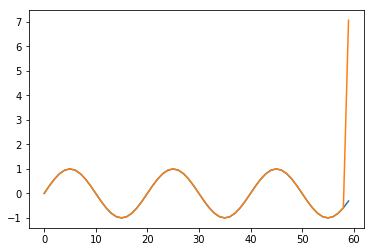

In [7]:
plt.plot(s_normal)
plt.plot(s_odd)

In [8]:
normoutliers = bootlier.find_outliers(s_normal)
print("normal:", normoutliers)

oddoutliers = bootlier.find_outliers(s_odd)
print("odd:", oddoutliers)

normal: ([], [])
odd: ([59], [7.0710678118654755])


## 3 sigma sine wave

In [9]:
s_normal = np.sin(np.arange(0,6*np.pi,0.1*np.pi))
s_odd = np.sin(np.arange(0,6*np.pi,0.1*np.pi))
s_odd[-1]=np.mean(s_odd)+3*np.std(s_odd)  # 3 sigma outlier at the end

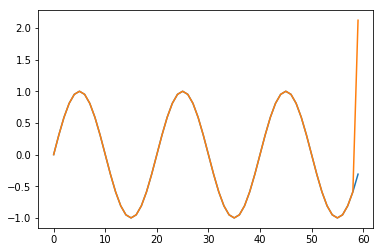

In [10]:
plt.plot(s_normal)
plt.plot(s_odd)

In [11]:
normoutliers = bootlier.find_outliers(s_normal)
print("normal:", normoutliers)

oddoutliers = bootlier.find_outliers(s_odd)
print("odd:", oddoutliers)

normal: ([], [])
odd: ([59], [2.1213203435596428])


## 5 sigma sine wave plus noise

In [12]:
s_signal = np.sin(np.arange(0,10*np.pi,0.1*np.pi))
s_noise = np.random.normal(0,0.5,len(s_signal))
s_normal = s_signal + s_noise

s_signal = np.sin(np.arange(0,10*np.pi,0.1*np.pi))
s_noise = np.random.normal(0,0.5,len(s_signal))
s_odd = s_signal + s_noise
s_odd[-1]=np.mean(s_odd)+5*np.std(s_odd)  # 5 sigma outlier at the end

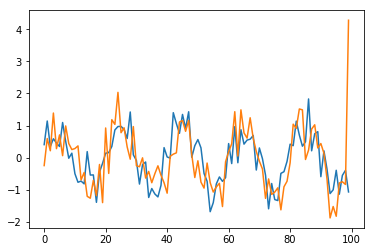

In [13]:
plt.plot(s_normal)
plt.plot(s_odd)

In [14]:
normoutliers = bootlier.find_outliers(s_normal)
print("normal:", normoutliers)

oddoutliers = bootlier.find_outliers(s_odd)
print("odd:", oddoutliers)

normal: ([], [])
odd: ([99], [4.2848778934543885])


## Increase sensitivity to outliers, might find more outliers in the noise

In [15]:
normoutliers = bootlier.find_outliers(s_normal, sensitivity=1.5)
print("normal:", normoutliers)

oddoutliers = bootlier.find_outliers(s_odd, sensitivity=1.5)
print("odd:", oddoutliers)

normal: ([54], [-1.6878177856716214])
odd: ([24, 99], [2.034472654135826, 4.2848778934543885])


## Challenger O-ring temperature data, until day of explosion

In [16]:
challenger = [66, 70, 69, 80, 68, 67, 72, 73, 70, 57, 63, 70, 78, 67, 53, 67, 75, 70, 81, 76, 79, 75, 76, 58, 31]

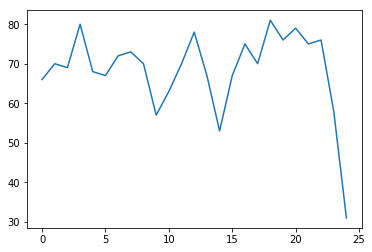

In [17]:
plt.plot(challenger)

In [18]:
oddoutliers = bootlier.find_outliers(challenger)
print("odd:", oddoutliers)

odd: ([24], [31])


### Test all points before the last launch for any outliers

In [19]:
oddoutliers = bootlier.find_outliers(challenger[:-1])
print("odd:", oddoutliers)

odd: ([], [])


## New York City taxi data from Numenta Anomaly Benchmark dataset

In [20]:
taxi = pd.read_csv('../data/realKnownCause/nyc_taxi.csv')
taxi.head()

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820


In [21]:
import datetime
taxi['time']=taxi.timestamp.apply(lambda x:datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

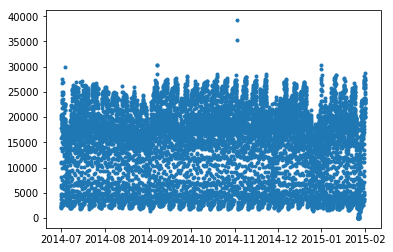

In [22]:
plt.plot(taxi.time, taxi.value, '.')

In [23]:
oddoutliers = bootlier.find_outliers(list(taxi.value),1.5)
print(oddoutliers)

([134, 3261, 3262, 5954, 5955, 8833, 8834, 10086], [29985, 30313, 30373, 39197, 35212, 29547, 30236, 8])


In [24]:
oddDF = taxi.loc[taxi['value'].isin(oddoutliers[1])]
oddDF

,timestamp,value,time
134,2014-07-03 19:00:00,29985,2014-07-03 19:00:00
3261,2014-09-06 22:30:00,30313,2014-09-06 22:30:00
3262,2014-09-06 23:00:00,30373,2014-09-06 23:00:00
5954,2014-11-02 01:00:00,39197,2014-11-02 01:00:00
5955,2014-11-02 01:30:00,35212,2014-11-02 01:30:00
8833,2015-01-01 00:30:00,29547,2015-01-01 00:30:00
8834,2015-01-01 01:00:00,30236,2015-01-01 01:00:00
10086,2015-01-27 03:00:00,8,2015-01-27 03:00:00


## Add in simple detrending via differencing

In [25]:
s_normal = np.sin(np.arange(0,6*np.pi,0.1*np.pi))
s_odd = np.sin(np.arange(0,6*np.pi,0.1*np.pi))
s_odd[int(len(s_odd)*0.5)]=np.mean(s_odd)+3*np.std(s_odd)  # 3 sigma outlier in the middle
x = 0.1
for i in range(len(s_odd)):
    s_odd[i] = s_odd[i] + x
    s_normal[i] = s_normal[i] + x
    x += 0.1

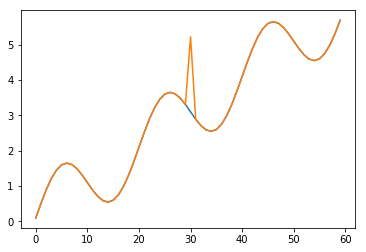

In [26]:
plt.plot(s_normal)
plt.plot(s_odd)

In [27]:
norm = bootlier.find_outliers(s_normal)
odd = bootlier.find_outliers(s_odd)
print(norm)
print(odd)

([], [])
([], [])


In [28]:
norm = bootlier.find_outliers(s_normal, detrend=True)
odd = bootlier.find_outliers(s_odd, detrend=True)
print(norm)
print(odd)

([], [])
([30, 31], [5.2213203435596443, 2.8909830056250545])
